# Autoencoders and an introduction to Artificial Neural Networks
Chapter 7 introduces us to Autoencoders, which are an unsupervised type of Artificial Neural Network (ANN) that can represent source input data in a compact fashion (_encoding step_) and restore the data from its compact form to a resonable facisimle (_decoding step_). One of the really cool properties about Autoencoders is that they are a form of ANN and Neural Network (NN) that can arbitrarily encode _any_ function so long as the following things hold true: (1) they include at least _one hidden layer_ or layer that cannot be directly manipulated as part of the network (other than its size) and (2) that the output of the encoding step is non-linear, and as such it uses an _activation function_ which turns the encoding step of the network into something non-linear. Examples of these functions include ones we've seen before as introduced in the book, e.g., _sigmoid_ (chapter 4), _tangent (tan)_ or a new one introduced, but not explained, _ReLU_ or _rectifying linear unit_. A side property of these functions is to not only turn the network non-linear, but also to represent _activation_ of the _neuron_ (really just one of the hidden layer values). If the neuron _fires_ then its activation is said to be represented by the non-linear function as _active_. So for example, in sigmoid, this would mean a resultant value of *1* or *0* if it hasn't fired and so on. Autoencoders have many uses in real life outside of data compression, for example:

   1. Anomaly Detection - If the Autoencoder learns a representation of a set of images, for example, and then another image that doesn't have a similar learned representation is provided to the network, the loss function variance should be quite different from those images trained in the network.
   2. De-noising - If provided an image containing ample noise (e.g., taken by a bad instrument or source, or manipulated in some way, through the internally learned representation of the network, the decoding step can actually restore or de-noise the image to its original or close to original form.
   3. Generative Neworks - for example to combine a learned representation of a bat, and a horse to generate (by averaging or using means) a "horse bat" or other things not seen before.
   
The book doesn't include an end of chapter assignment suggestion, but the last thing you do in the book for this listing (7.9-7.13) is to download some images from the [CIFAR-10 Python Dataset](http://www.cs.toronto.edu/~kriz/cifar.html) which are labeled images from the [80 million tiny images dataset](http://people.csail.mit.edu/torralba/tinyimages/) of 10 classes/types of objects, and then to represent the images (*32 x 32* pixels in *RGB* format) using an Autoencoder. In particular the book shows you how to take the image, represent an image of 32x32 pixels in row major order (e.g., as a vector of \[1x1024\] pixels) and then for the R,G,B values in each pixel, how to average them into a greyscale intensity. From there, you can select, e.g., all the pictures of horses (5000 images), and build an Autoencoder network using Tensorflow to encode and decode the image and test out the learned representations of them image(s). 

I had to dig around in the book code for some additional examples beyond this. I found [Ch07 Examples](https://github.com/BinRoot/TensorFlow-Book/tree/master/ch07_autoencoder) that had some cool additional things to check out, in particular:

   1. Image plotting code to show you the horses you are selecting, and also to plot their learned representations, so you can visualize the input and output of the network from CIFAR-10.
   2. Code to perform a _classify_ function - yes - Autoencoders can be used similar to regression techniques to take their learned representation and classify things of a particular type (e.g., train up on horse images, and then use the learned loss as a differentiator for other types of images (e.g., of a dog). Interestingly, the variation is small (likely due to the smallness of the images), only about *1.5* but it's still statistically significant and obviously this is something that you can threshold when building a classifier of a particular type. For example I imagine if you were to build a gun classifier for a particular type of semi-automatic gun, you would train on a bunch of those images into an Autoencoder network, and then test it against some other gun types to figure out the right loss-threshold balance that signifies the class of semi-automatic in a meaningful way.
   3. Code to do a De-Noising Autoencoder, see [this example](https://github.com/BinRoot/TensorFlow-Book/blob/master/ch07_autoencoder/Concept03_denoising.ipynb). I didn't play around with it directly but it is similar to this [other example](https://github.com/pkmital/tensorflow_tutorials/blob/master/python/08_denoising_autoencoder.py) I found though that example uses another style of Tensorflow network construction which looks to be more explicit than the implicit way the book is teaching us.
   4. Code to do a Deep Autoencoder, or [Stacked Autoencoder](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) like is discussed in the book. Ended up hooking this up to the Tensorflow Dataset API for fun.
   
I made a diagram of the encoding and decoding process. I was thinking of doing an assignment to build e.g., an automatic weapons classifier or "long gun" or something classifier as I was motivated by some of the prior [DARPA MEMEX](http://memex.jpl.nasa.gov/) work we did in the area. I may do one, but I understand the concept enough now that I felt I would simply annotate the last listings and move on to the next chapter.

![Autoencoder Process](figs/ch07-autoencoder.png)

## References

   1. [CIFAR-10/-100 dataset](http://www.cs.toronto.edu/~kriz/cifar.html) - the key data used to illustrate the Autoencoder concepts.
   2. [Stanford's Unsupervised Learning Autoencoder chapter](http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/) - A fantastic theoretical introduction to Autoencoders. A bit out of my league in the math, but worth a look if you want to understand the core theory.
   3. [Wikipedia article on Autoencoders](https://en.wikipedia.org/wiki/Autoencoder) - Besides the theory has some good use cases that explain what an Autoencoder is for.
   4. [Autoencoders and the CIFAR dataset](https://www.guru99.com/autoencoder-deep-learning.html) - Looks like this is where the book chose its examples from for Tensorflow although the examples here use the more explicit network creation methods in Tensorflow rather than the implicit stuff taught in the book.
   5. [Deep Autoencoders and Dimensionality Reduction](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) - Shows how Autoencoders are similar to PCA and other dimensionality reduction techniques.
   6. [Different use cases for Autoencoders](https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726) - Shows how Autoencoders are used for different use cases. 
   7. [Deep AutoEncoders using TensorFlow - Towards Data Science](https://towardsdatascience.com/deep-autoencoders-using-tensorflow-c68f075fd1a3) - Great post for a 3 dimensional Deep auto encoder on MNIST. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pickle
import time

/Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mattmann/git/buildout.python/python-3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mat

In [2]:
def get_batch(X, size):
    a = np.random.choice(len(X), size, replace=False)
    return X[a]

class Autoencoder:
    def __init__(self, input_dim, hidden_dim, epoch=1000, batch_size=50, learning_rate=0.001):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
        with tf.name_scope('encode'):
            weights = tf.Variable(tf.random_normal([input_dim, hidden_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([hidden_dim]), name='biases')
            encoded = tf.nn.sigmoid(tf.matmul(x, weights) + biases)
        with tf.name_scope('decode'):
            weights = tf.Variable(tf.random_normal([hidden_dim, input_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([input_dim]), name='biases')
            decoded = tf.matmul(encoded, weights) + biases

        self.x = x
        self.encoded = encoded
        self.decoded = decoded

        self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.decoded))))
        self.train_op = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.loss)
        
        self.saver = tf.train.Saver()

    def train(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epoch):
                for j in range(np.shape(data)[0] // self.batch_size):
                    batch_data = get_batch(data, self.batch_size)
                    l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x: batch_data})
                if i % 10 == 0:
                    print('epoch {0}: loss = {1}'.format(i, l))
                    self.saver.save(sess, './model.ckpt')
            self.saver.save(sess, './model.ckpt')
        
    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, './model.ckpt')
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data})
        print('input', data)
        print('compressed', hidden)
        print('reconstructed', reconstructed)
        return reconstructed
    
    def classify(self, data, labels):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, './model.ckpt')
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data})
            reconstructed = reconstructed[0]
            # loss = sess.run(self.all_loss, feed_dict={self.x: data})
            print('data', np.shape(data))
            print('reconstructed', np.shape(reconstructed))
            loss = np.sqrt(np.mean(np.square(data - reconstructed), axis=1))
            print('loss', np.shape(loss))
            horse_indices = np.where(labels == 7)[0]
            not_horse_indices = np.where(labels != 7)[0]
            horse_loss = np.mean(loss[horse_indices])
            not_horse_loss = np.mean(loss[not_horse_indices])
            print('horse', horse_loss)
            print('not horse', not_horse_loss)
            return hidden

    def decode(self, encoding):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, './model.ckpt')
            reconstructed = sess.run(self.decoded, feed_dict={self.encoded: encoding})
        img = np.reshape(reconstructed, (32, 32))
        return img


In [3]:
def get_batch_n(X, Xn, size):
    a = np.random.choice(len(X), size, replace=False)
    return X[a], Xn[a]


class Denoiser:

    def __init__(self, input_dim, hidden_dim, epoch=10000, batch_size=50, learning_rate=0.001):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        self.x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='x')
        self.x_noised = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='x_noised')
        with tf.name_scope('encode'):
            self.weights1 = tf.Variable(tf.random_normal([input_dim, hidden_dim], dtype=tf.float32), name='weights')
            self.biases1 = tf.Variable(tf.zeros([hidden_dim]), name='biases')
            self.encoded = tf.nn.sigmoid(tf.matmul(self.x_noised, self.weights1) + self.biases1, name='encoded')
        with tf.name_scope('decode'):
            weights = tf.Variable(tf.random_normal([hidden_dim, input_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([input_dim]), name='biases')
            self.decoded = tf.matmul(self.encoded, weights) + biases
        self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.decoded))))
        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        self.saver = tf.train.Saver()

    def add_noise(self, data):
        noise_type = 'mask-0.2'
        if noise_type == 'gaussian':
            n = np.random.normal(0, 0.1, np.shape(data))
            return data + n
        if 'mask' in noise_type:
            frac = float(noise_type.split('-')[1])
            temp = np.copy(data)
            for i in temp:
                n = np.random.choice(len(i), round(frac * len(i)), replace=False)
                i[n] = 0
            return temp

    def train(self, data):
        data_noised = self.add_noise(data)
        with open('log.csv', 'w') as writer:
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                for i in range(self.epoch):
                    for j in range(50):
                        batch_data, batch_data_noised = get_batch_n(data, data_noised, self.batch_size)
                        l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x: batch_data, self.x_noised: batch_data_noised})
                    if i % 10 == 0:
                        print('epoch {0}: loss = {1}'.format(i, l))
                        self.saver.save(sess, './model.ckpt')
                        epoch_time = int(time.time())
                        row_str = str(epoch_time) + ',' + str(i) + ',' + str(l) + '\n'
                        writer.write(row_str)
                        writer.flush()
                self.saver.save(sess, './model.ckpt')

    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, './model.ckpt')
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data})
        print('input', data)
        print('compressed', hidden)
        print('reconstructed', reconstructed)
        return reconstructed
    
    def classify(self, data, labels):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, './model.ckpt')
            data_noised = self.add_noise(data)
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x: data, self.x_noised:data_noised})
            reconstructed = reconstructed[0]
            # loss = sess.run(self.all_loss, feed_dict={self.x: data})
            print('data', np.shape(data))
            print('reconstructed', np.shape(reconstructed))
            loss = np.sqrt(np.mean(np.square(data - reconstructed), axis=1))
            print('loss', np.shape(loss))
            horse_indices = np.where(labels == 7)[0]
            not_horse_indices = np.where(labels != 7)[0]
            horse_loss = np.mean(loss[horse_indices])
            not_horse_loss = np.mean(loss[not_horse_indices])
            print('horse', horse_loss)
            print('not horse', not_horse_loss)
            return hidden

    def get_params(self):
        with tf.Session() as sess:
            self.saver.restore(sess, './model.ckpt')
            weights, biases = sess.run([self.weights1, self.biases1])
        return weights, biases
    
    def decode(self, encoding):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, './model.ckpt')
            reconstructed = sess.run(self.decoded, feed_dict={self.encoded: encoding})
        img = np.reshape(reconstructed, (32, 32))
        return img

In [29]:
class StackedAutoencoder:
    def __init__(self, input_dim, num_hidden_layers=3, epoch=100, batch_size=250, learning_rate=0.01):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.idim = [None]*num_hidden_layers
        self.hdim = [None]*num_hidden_layers
        self.hidden = [None]*num_hidden_layers
        self.weights = [None]*num_hidden_layers
        self.biases = [None]*num_hidden_layers

        x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
        initializer=tf.variance_scaling_initializer()
        #initializer=tf.random.normal
        output_dim = input_dim
        act=tf.nn.relu
        
        # network construction - [input to hidden]            
        for i in range(0, num_hidden_layers):
            self.idim[i] = int(input_dim / (2*i)) if i else input_dim 
            self.hdim[i] = int(input_dim / (2*(i+1))) if i < num_hidden_layers-1 else int(input_dim/2)
            print('%s, weights [%d, %d] biases %d' % ("hidden layer "+str(i+1) if i else "input to hidden layer 1", self.idim[i], self.hdim[i], self.hdim[i]))
            self.weights[i] = tf.Variable(initializer([self.idim[i], self.hdim[i]]), dtype=tf.float32, name='weights'+str(i))
            self.biases[i] = tf.Variable(tf.zeros([self.hdim[i]]), name='biases'+str(i))
            
            if i == 0:
                self.hidden[i] = act(tf.matmul(x, self.weights[i]) + self.biases[i])
            else:
                self.hidden[i] = act(tf.matmul(self.hidden[i-1], self.weights[i]) + self.biases[i])
        
        #output layer
        print('output layer, weights [%d, %d] biases %d' % (self.hdim[num_hidden_layers-1], output_dim, output_dim))
        self.output_weight = tf.Variable(initializer([self.hdim[num_hidden_layers-1], output_dim]), dtype=tf.float32, name='output_weight')
        self.output_bias = tf.Variable(tf.zeros([output_dim]), name='output_bias')
        self.output_layer = act(tf.matmul(self.hidden[num_hidden_layers-1], self.output_weight)+self.output_bias)


        self.x = x
        self.loss = tf.reduce_mean(tf.square(self.output_layer-self.x))
        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        #self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.output_layer))))
        #self.train_op = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.loss)
        
        self.saver = tf.train.Saver()

    def train(self, data):
        features = data
        features_placeholder = tf.placeholder(features.dtype, features.shape)
        dataset = tf.data.Dataset.from_tensor_slices((features_placeholder))
        dataset = dataset.shuffle(buffer_size=100)
        dataset = dataset.batch(self.batch_size)

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epoch):
                batch_num=0
                iter = dataset.make_initializable_iterator()
                sess.run(iter.initializer, feed_dict={features_placeholder: features})
                iter_op = iter.get_next()
                
                while True:
                    try:
                        batch_data = sess.run(iter_op)
                        l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x: batch_data})
                        batch_num += 1
                    except tf.errors.OutOfRangeError:
                        break
                
                print('epoch {0}: loss = {1}'.format(i, l))
                self.saver.save(sess, './model.ckpt')
        
    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, './model.ckpt')
            hidden, reconstructed = sess.run([self.hidden[num_hidden_layers-1], self.output_layer], feed_dict={self.x: data})
        print('input', data)
        print('compressed', hidden)
        print('reconstructed', reconstructed)
        return reconstructed
    
    def classify(self, data, labels):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, './model.ckpt')
            hidden, reconstructed = sess.run([self.hidden[num_hidden_layers-1], self.output_layer], feed_dict={self.x: data})
            reconstructed = reconstructed[0]
            # loss = sess.run(self.all_loss, feed_dict={self.x: data})
            print('data', np.shape(data))
            print('reconstructed', np.shape(reconstructed))
            loss = np.sqrt(np.mean(np.square(data - reconstructed), axis=1))
            print('loss', np.shape(loss))
            horse_indices = np.where(labels == 7)[0]
            not_horse_indices = np.where(labels != 7)[0]
            horse_loss = np.mean(loss[horse_indices])
            not_horse_loss = np.mean(loss[not_horse_indices])
            print('horse', horse_loss)
            print('not horse', not_horse_loss)
            return hidden

    def decode(self, encoding):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, './model.ckpt')
            reconstructed = sess.run(self.output_layer, feed_dict={self.hidden[num_hidden_layers-1]: encoding})
        img = np.reshape(reconstructed, (32, 32))
        return img
    
    def results(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            self.saver.restore(sess, './model.ckpt')
            results = sess.run(self.output_layer, feed_dict={self.x:data})
        
        return results

In [5]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [6]:
def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

In [7]:
names = unpickle('./cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = './cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

In [8]:
data = grayscale(data)

In [9]:
x = np.matrix(data)
y = np.array(labels)
print(np.shape(x))
print(y)

(50000, 1024)
[6 9 9 ... 9 1 1]


In [10]:
horse_indices = np.where(y == 7)[0]
horse_x = x[horse_indices]
print(np.shape(horse_x))  # (5000, 3072)

(5000, 1024)


Some examples of horse images we will feed to the autoencoder for training


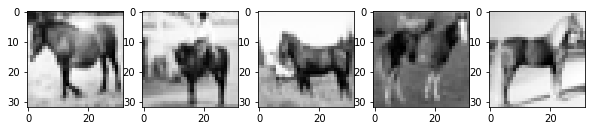

In [11]:
print('Some examples of horse images we will feed to the autoencoder for training')
plt.rcParams['figure.figsize'] = (10, 10)
num_examples = 5
for i in range(num_examples):
    horse_img = np.reshape(horse_x[i, :], (32, 32))
    plt.subplot(1, num_examples, i+1)
    plt.imshow(horse_img, cmap='Greys_r')
plt.show()

In [12]:
input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim)
ae.train(horse_x)

Instructions for updating:
Colocations handled automatically by placer.
epoch 0: loss = 132.38836669921875
epoch 10: loss = 70.44325256347656
epoch 20: loss = 59.79197311401367
epoch 30: loss = 57.10063552856445
epoch 40: loss = 54.08665084838867
epoch 50: loss = 56.673851013183594
epoch 60: loss = 55.384368896484375
epoch 70: loss = 51.92653274536133
epoch 80: loss = 55.36239242553711
epoch 90: loss = 49.87511444091797
epoch 100: loss = 51.92190170288086
epoch 110: loss = 51.128055572509766
epoch 120: loss = 50.5228271484375
epoch 130: loss = 57.41741180419922
epoch 140: loss = 50.532264709472656
epoch 150: loss = 50.77375411987305
epoch 160: loss = 49.652252197265625
epoch 170: loss = 50.12567901611328
epoch 180: loss = 51.375160217285156
epoch 190: loss = 50.38551330566406
epoch 200: loss = 52.940467834472656
epoch 210: loss = 49.40411376953125
epoch 220: loss = 49.2136116027832
epoch 230: loss = 51.36134338378906
epoch 240: loss = 51.804134368896484
epoch 250: loss = 52.41897201538

In [13]:
test_data = unpickle('./cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
encodings = ae.classify(test_x, test_labels)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./model.ckpt
data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 71.478931358442
not horse 71.0916754975794


INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tenso

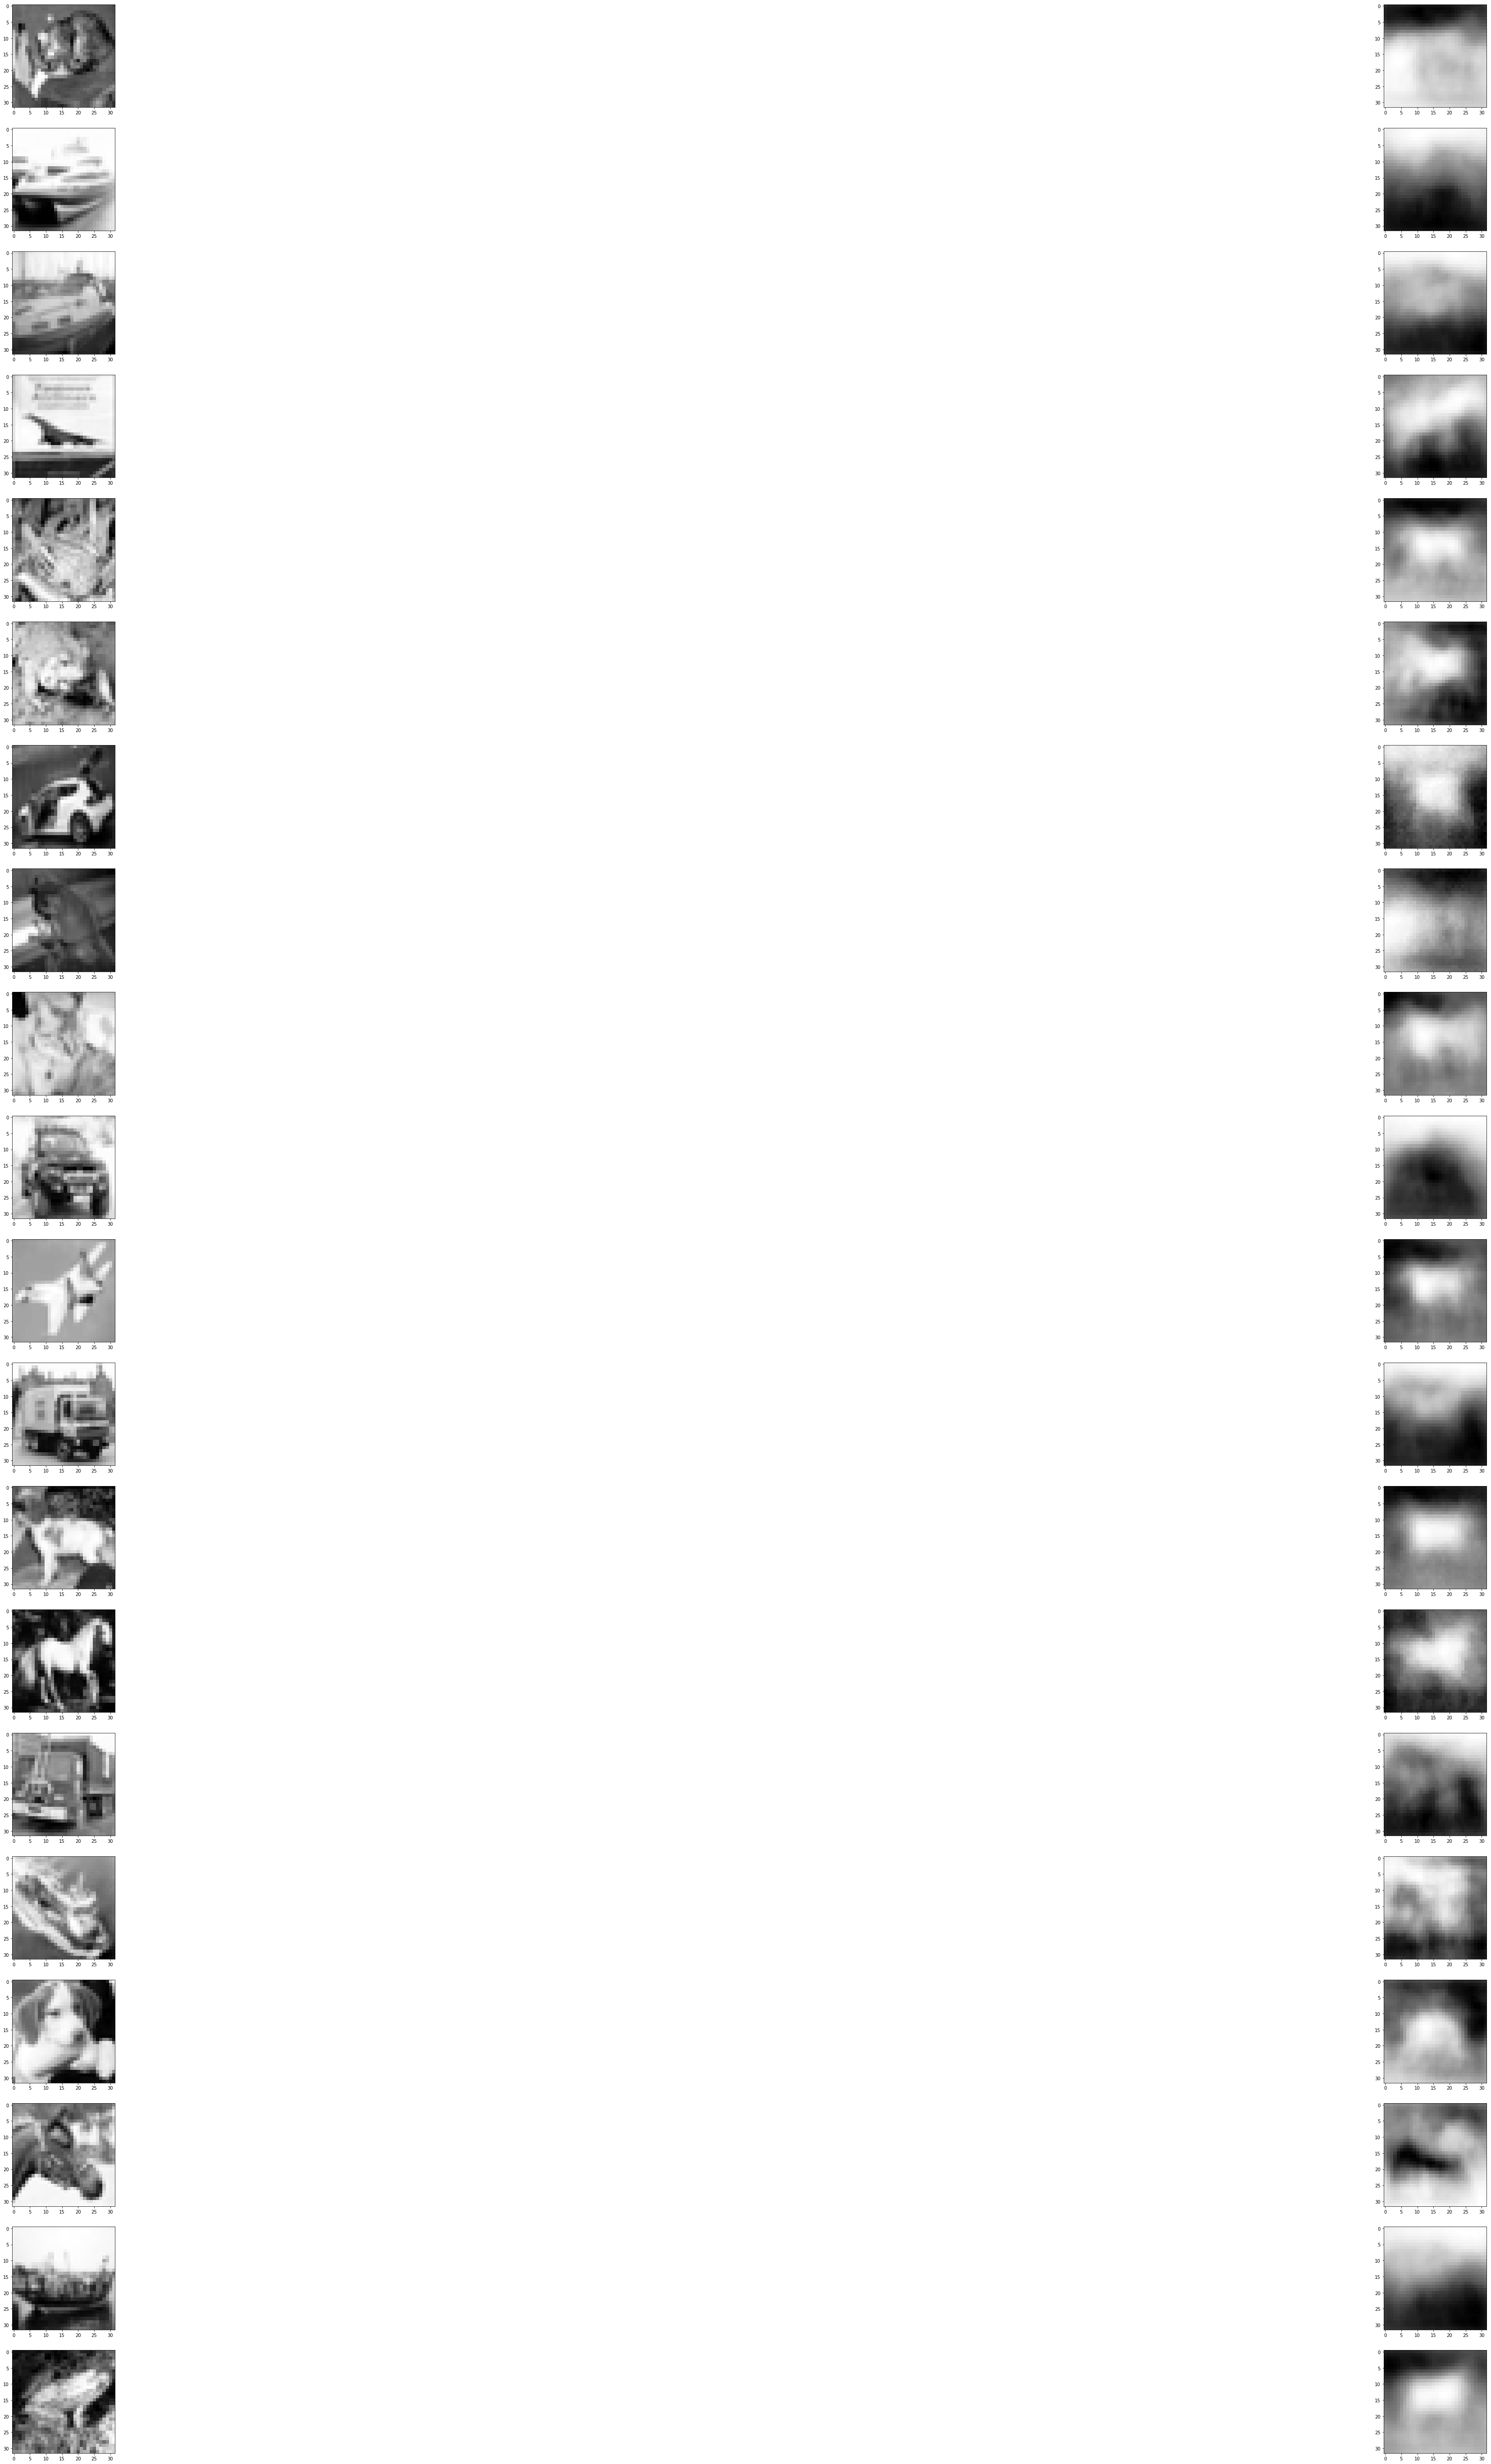

In [14]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_x[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = ae.decode([encodings[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()

In [15]:
ae_dn = Denoiser(input_dim, hidden_dim)
ae_dn.train(horse_x)

epoch 0: loss = 128.7778778076172
epoch 10: loss = 80.82189178466797
epoch 20: loss = 63.27671813964844
epoch 30: loss = 59.15705108642578
epoch 40: loss = 58.87049102783203
epoch 50: loss = 57.91984939575195
epoch 60: loss = 59.52788543701172
epoch 70: loss = 58.13776779174805
epoch 80: loss = 58.2647590637207
epoch 90: loss = 58.671112060546875
epoch 100: loss = 57.20099639892578
epoch 110: loss = 60.4165153503418
epoch 120: loss = 56.54208755493164
epoch 130: loss = 60.39126968383789
epoch 140: loss = 59.38920974731445
epoch 150: loss = 57.72147750854492
epoch 160: loss = 57.220237731933594
epoch 170: loss = 56.62673568725586
epoch 180: loss = 54.39928436279297
epoch 190: loss = 56.76688766479492
epoch 200: loss = 57.053916931152344
epoch 210: loss = 57.313255310058594
epoch 220: loss = 56.66313171386719
epoch 230: loss = 54.34910202026367
epoch 240: loss = 59.31112289428711
epoch 250: loss = 52.390098571777344
epoch 260: loss = 55.53314208984375
epoch 270: loss = 51.49542999267578


epoch 2240: loss = 52.145023345947266
epoch 2250: loss = 51.25365447998047
epoch 2260: loss = 48.534114837646484
epoch 2270: loss = 51.02869415283203
epoch 2280: loss = 52.76864242553711
epoch 2290: loss = 48.420528411865234
epoch 2300: loss = 50.56974792480469
epoch 2310: loss = 49.41651916503906
epoch 2320: loss = 49.5135383605957
epoch 2330: loss = 51.3026123046875
epoch 2340: loss = 52.9600715637207
epoch 2350: loss = 45.81393051147461
epoch 2360: loss = 47.899436950683594
epoch 2370: loss = 50.59062194824219
epoch 2380: loss = 47.5932731628418
epoch 2390: loss = 49.61726379394531
epoch 2400: loss = 49.84091567993164
epoch 2410: loss = 53.62588119506836
epoch 2420: loss = 51.789772033691406
epoch 2430: loss = 49.02815246582031
epoch 2440: loss = 51.104591369628906
epoch 2450: loss = 53.56908416748047
epoch 2460: loss = 49.458133697509766
epoch 2470: loss = 50.398319244384766
epoch 2480: loss = 48.317726135253906
epoch 2490: loss = 50.741886138916016
epoch 2500: loss = 50.8566513061

epoch 4450: loss = 49.61431884765625
epoch 4460: loss = 51.903446197509766
epoch 4470: loss = 49.86967468261719
epoch 4480: loss = 50.6583137512207
epoch 4490: loss = 49.79862976074219
epoch 4500: loss = 45.716800689697266
epoch 4510: loss = 50.77947998046875
epoch 4520: loss = 49.68154525756836
epoch 4530: loss = 50.40495300292969
epoch 4540: loss = 50.9913330078125
epoch 4550: loss = 49.027347564697266
epoch 4560: loss = 50.59142303466797
epoch 4570: loss = 48.55379867553711
epoch 4580: loss = 48.70377731323242
epoch 4590: loss = 50.718109130859375
epoch 4600: loss = 49.824459075927734
epoch 4610: loss = 46.81509017944336
epoch 4620: loss = 47.169185638427734
epoch 4630: loss = 46.48650360107422
epoch 4640: loss = 51.04973220825195
epoch 4650: loss = 50.76676559448242
epoch 4660: loss = 50.02103042602539
epoch 4670: loss = 47.46459197998047
epoch 4680: loss = 49.64841842651367
epoch 4690: loss = 48.90830612182617
epoch 4700: loss = 54.079917907714844
epoch 4710: loss = 49.69730758666

epoch 6660: loss = 49.097023010253906
epoch 6670: loss = 47.357303619384766
epoch 6680: loss = 48.5678596496582
epoch 6690: loss = 48.6804313659668
epoch 6700: loss = 50.262725830078125
epoch 6710: loss = 50.11792755126953
epoch 6720: loss = 49.322357177734375
epoch 6730: loss = 51.049476623535156
epoch 6740: loss = 49.072486877441406
epoch 6750: loss = 48.771461486816406
epoch 6760: loss = 49.468040466308594
epoch 6770: loss = 46.194427490234375
epoch 6780: loss = 48.61897277832031
epoch 6790: loss = 49.97628402709961
epoch 6800: loss = 50.71955871582031
epoch 6810: loss = 45.92444610595703
epoch 6820: loss = 47.495670318603516
epoch 6830: loss = 47.92584991455078
epoch 6840: loss = 51.59614944458008
epoch 6850: loss = 47.90931701660156
epoch 6860: loss = 48.10026168823242
epoch 6870: loss = 48.905677795410156
epoch 6880: loss = 51.181610107421875
epoch 6890: loss = 49.94559860229492
epoch 6900: loss = 51.58873748779297
epoch 6910: loss = 50.28883743286133
epoch 6920: loss = 50.837421

epoch 8870: loss = 47.925865173339844
epoch 8880: loss = 46.647705078125
epoch 8890: loss = 49.66893768310547
epoch 8900: loss = 48.523521423339844
epoch 8910: loss = 50.985801696777344
epoch 8920: loss = 49.11328125
epoch 8930: loss = 49.29723358154297
epoch 8940: loss = 49.08903503417969
epoch 8950: loss = 49.60322570800781
epoch 8960: loss = 46.679832458496094
epoch 8970: loss = 47.35783004760742
epoch 8980: loss = 50.590003967285156
epoch 8990: loss = 47.175086975097656
epoch 9000: loss = 51.53974914550781
epoch 9010: loss = 50.130855560302734
epoch 9020: loss = 50.171417236328125
epoch 9030: loss = 49.895545959472656
epoch 9040: loss = 46.90841293334961
epoch 9050: loss = 46.80243682861328
epoch 9060: loss = 48.311729431152344
epoch 9070: loss = 46.26091003417969
epoch 9080: loss = 48.2213134765625
epoch 9090: loss = 49.14401626586914
epoch 9100: loss = 54.52885055541992
epoch 9110: loss = 48.58152389526367
epoch 9120: loss = 47.069671630859375
epoch 9130: loss = 48.21467208862305

In [16]:
encodings = ae_dn.classify(test_x, test_labels)

INFO:tensorflow:Restoring parameters from ./model.ckpt
data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 67.57038929539014
not horse 66.0859918407996


INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tenso

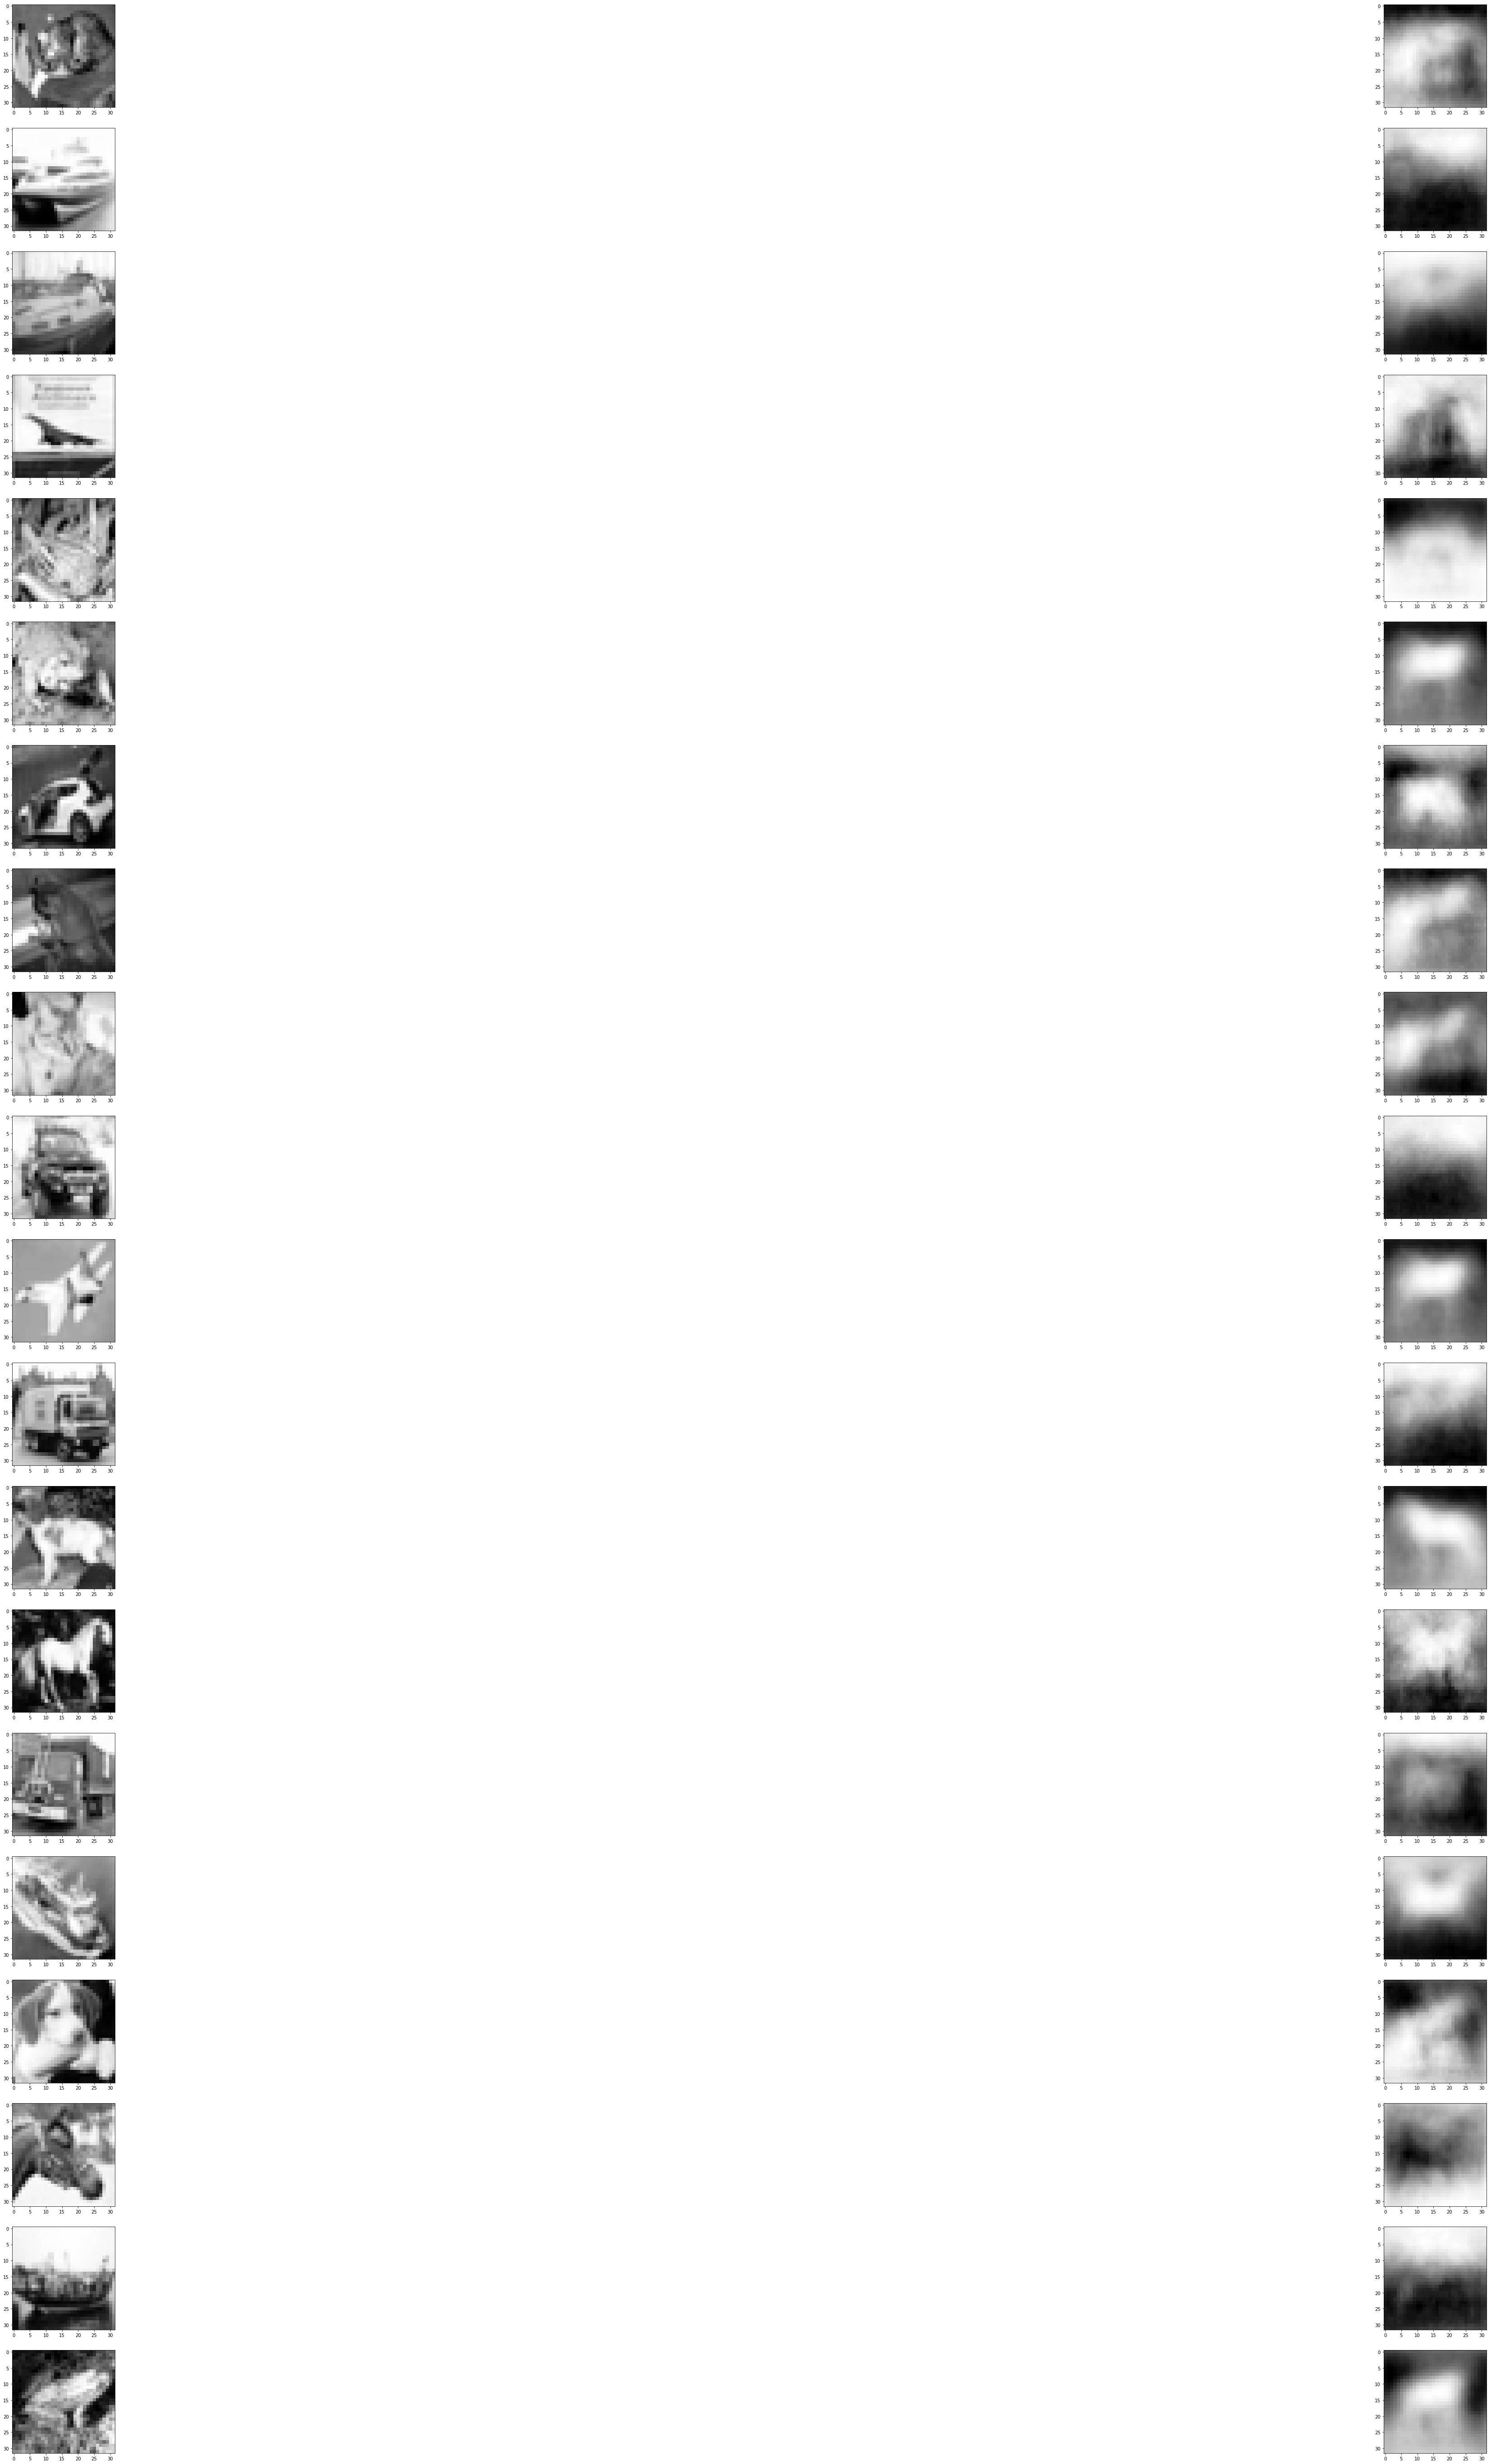

In [17]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_x[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = ae_dn.decode([encodings[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()

In [30]:
input_dim = np.shape(horse_x)[1]
num_hidden_layers = 3
s_ae = StackedAutoencoder(input_dim, num_hidden_layers=num_hidden_layers)
s_ae.train(horse_x)

input to hidden layer 1, weights [1024, 512] biases 512
hidden layer 2, weights [512, 256] biases 256
hidden layer 3, weights [256, 512] biases 512
output layer, weights [512, 1024] biases 1024
epoch 0: loss = 17858.447265625
epoch 1: loss = 4206.99072265625
epoch 2: loss = 3479.27978515625
epoch 3: loss = 3028.162841796875
epoch 4: loss = 2839.44921875
epoch 5: loss = 2837.64111328125
epoch 6: loss = 2767.04248046875
epoch 7: loss = 2709.646484375
epoch 8: loss = 2667.451416015625
epoch 9: loss = 2412.876953125
epoch 10: loss = 2359.757080078125
epoch 11: loss = 2319.665771484375
epoch 12: loss = 2334.54736328125
epoch 13: loss = 2336.291015625
epoch 14: loss = 2361.572509765625
epoch 15: loss = 2310.263671875
epoch 16: loss = 2269.841064453125
epoch 17: loss = 2268.8369140625
epoch 18: loss = 2330.6689453125
epoch 19: loss = 2266.75048828125
epoch 20: loss = 2186.84765625
epoch 21: loss = 2164.806884765625
epoch 22: loss = 3259.719482421875
epoch 23: loss = 2280.4482421875
epoch 24: 

In [31]:
s_ae.test(test_x)

INFO:tensorflow:Restoring parameters from ./model.ckpt
input [[106.33333333 105.66666667 110.66666667 ...  75.          82.33333333
   66.        ]
 [235.         231.         232.         ... 176.33333333 188.66666667
  195.        ]
 [190.         187.66666667 166.33333333 ...   6.33333333   4.
    7.33333333]
 ...
 [ 15.66666667  14.66666667  13.33333333 ...  32.33333333  34.
   30.66666667]
 [ 25.66666667  18.          27.33333333 ...  99.          99.66666667
   97.33333333]
 [ 75.33333333 104.66666667 106.33333333 ... 108.33333333  63.66666667
   26.33333333]]
compressed [[35.743343  0.        0.       ...  0.        0.       66.73388 ]
 [81.36751   0.        0.       ...  0.        0.       18.264786]
 [92.496506  0.        0.       ...  0.        0.        9.002229]
 ...
 [ 0.        0.        0.       ...  0.        0.       22.228645]
 [16.705578  0.        0.       ...  0.        0.       47.701286]
 [42.702507  0.        0.       ...  0.        0.       25.423653]]
reconstr

array([[ 95.44011 ,  93.29914 ,  94.66409 , ...,  99.22609 ,  98.10517 ,
         98.1776  ],
       [212.39769 , 212.94395 , 220.34174 , ...,  85.98973 ,  80.219215,
         83.17283 ],
       [199.76294 , 202.95236 , 207.09813 , ...,  66.944305,  64.308   ,
         65.95225 ],
       ...,
       [ 13.60563 ,  10.724634,   9.489879, ...,  82.547424,  84.70624 ,
         71.60059 ],
       [ 74.374596,  76.22384 ,  80.082924, ..., 106.01488 , 102.9593  ,
         99.9748  ],
       [142.96863 , 142.98686 , 145.52074 , ..., 109.0025  , 106.641945,
        107.24416 ]], dtype=float32)

In [32]:
test_data = unpickle('./cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
encodings = s_ae.classify(test_x, test_labels)

INFO:tensorflow:Restoring parameters from ./model.ckpt
data (10000, 1024)
reconstructed (1024,)
loss (10000,)
horse 65.07798135555151
not horse 63.93220293262414


INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tenso

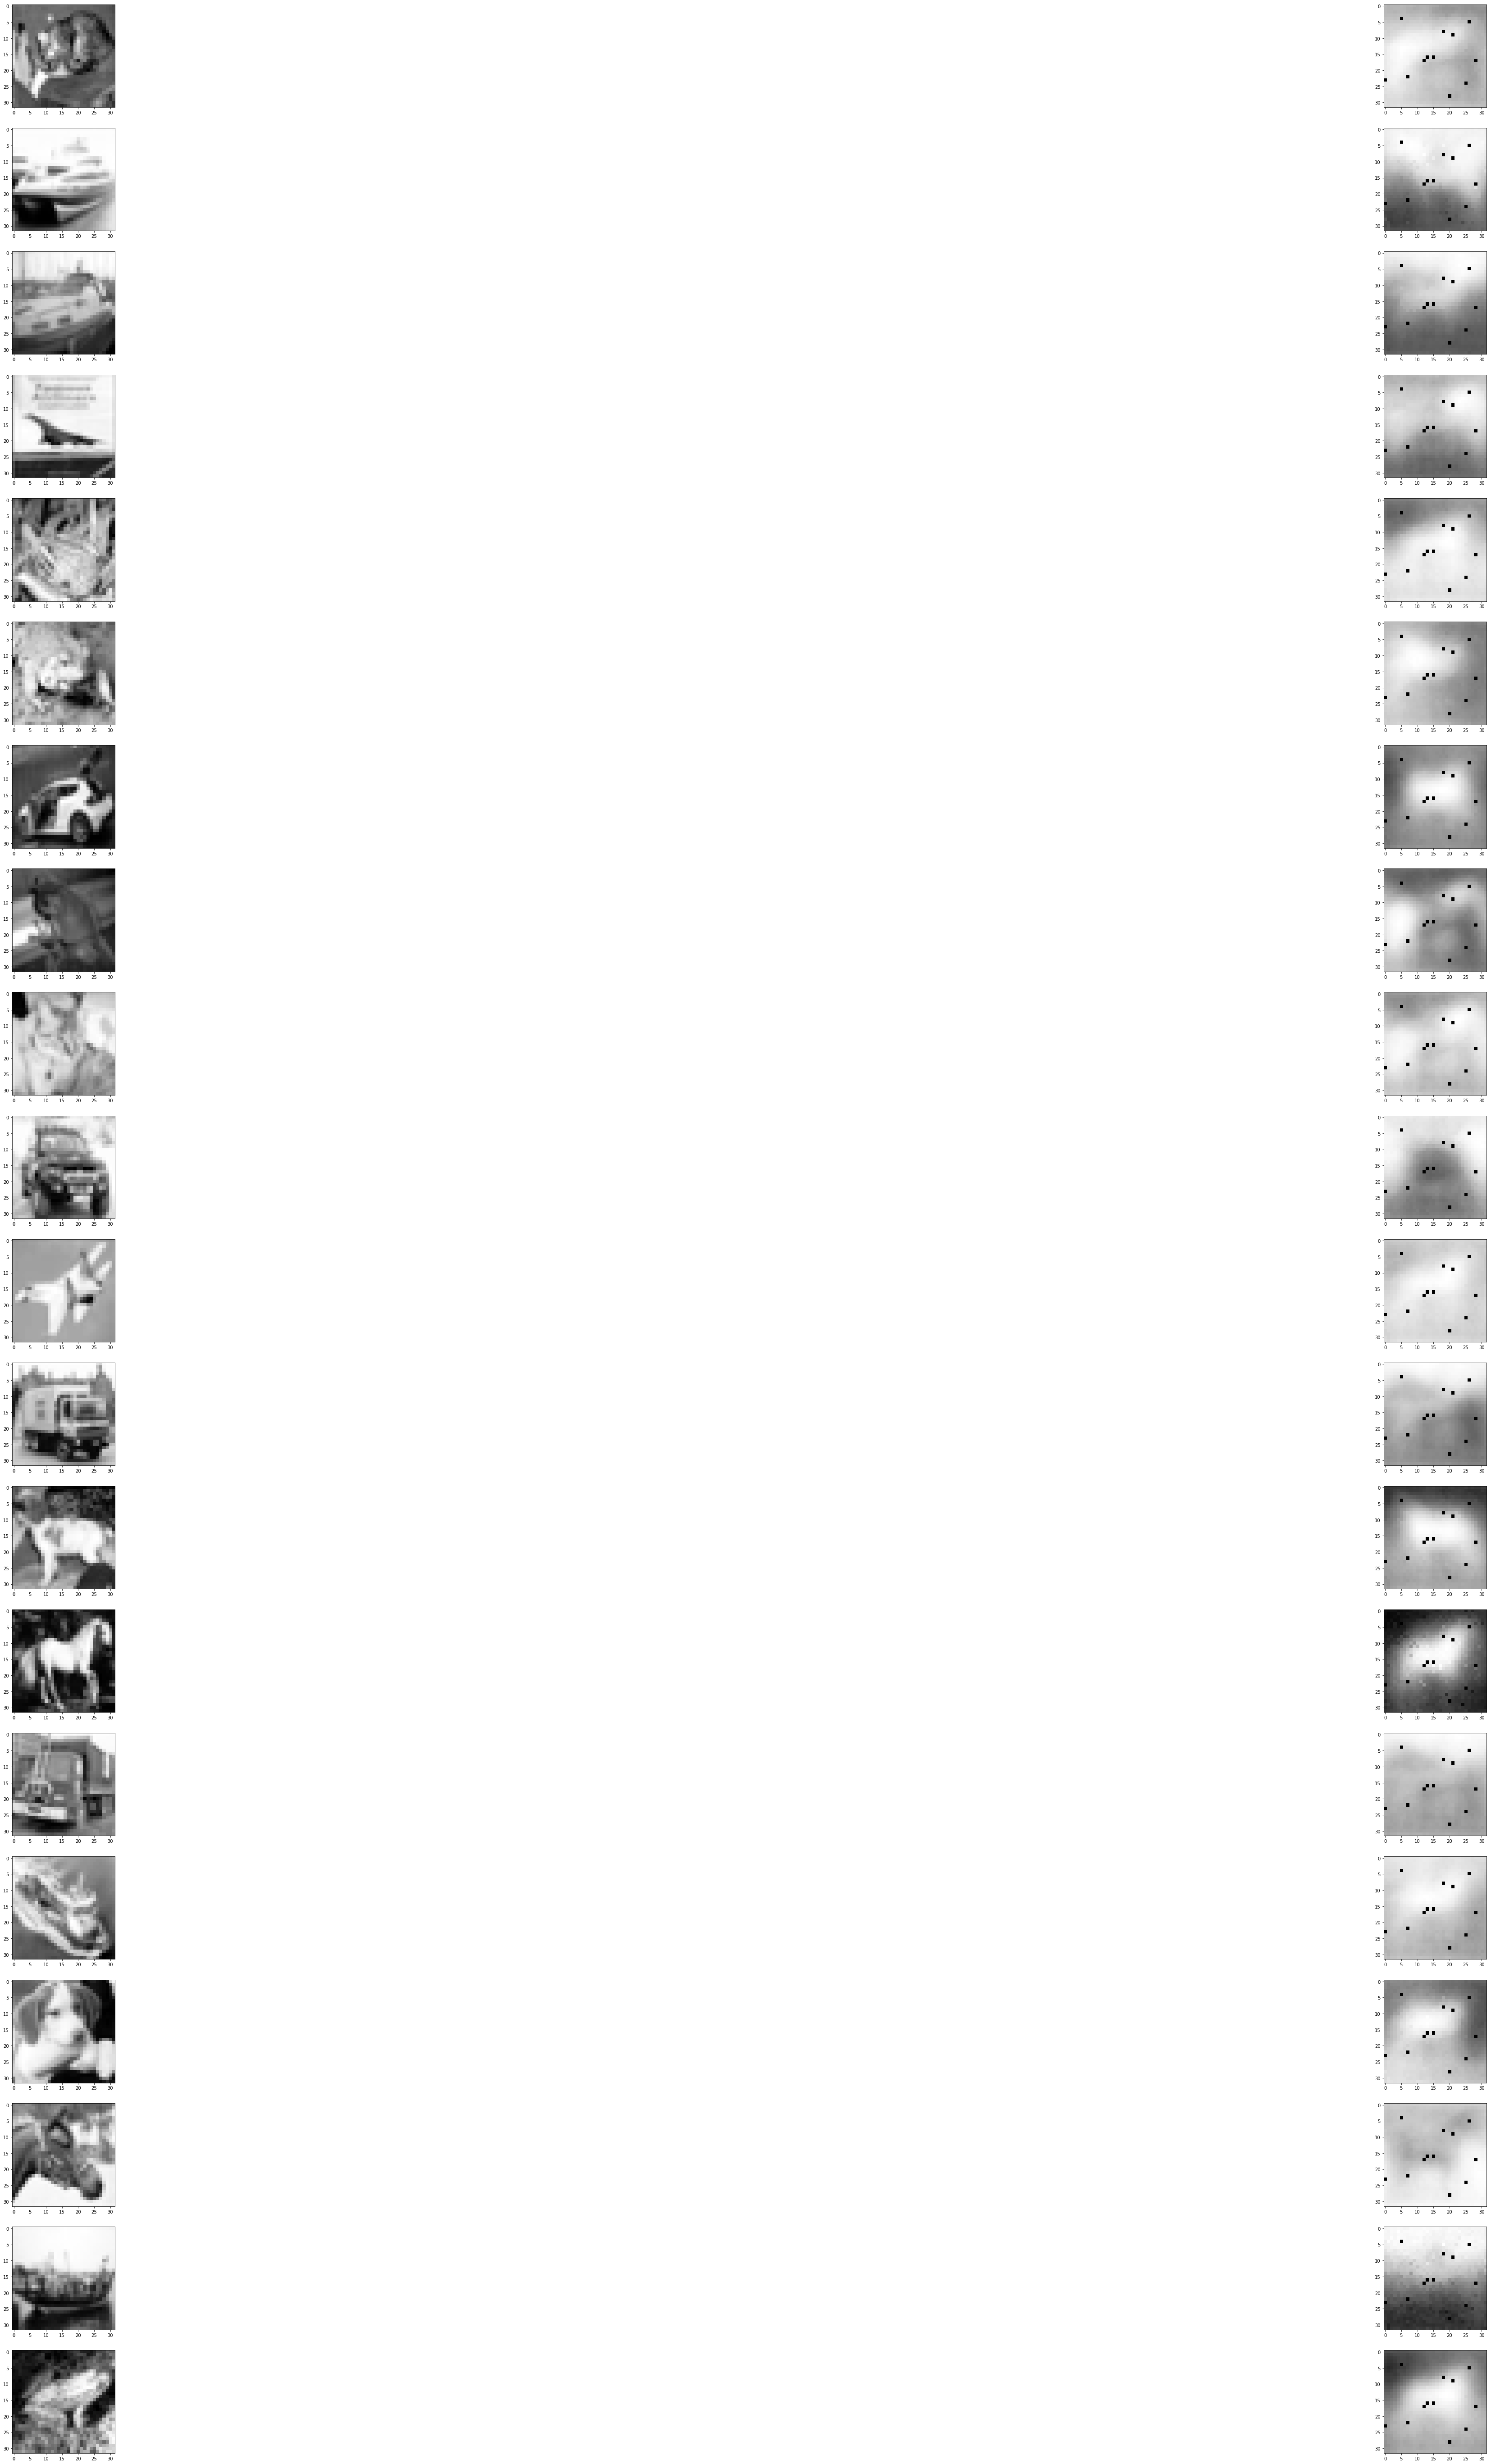

In [33]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_x[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = s_ae.decode([encodings[i]])
    plt.imshow(reconstructed_img, cmap='Greys_r')

plt.show()

INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tenso

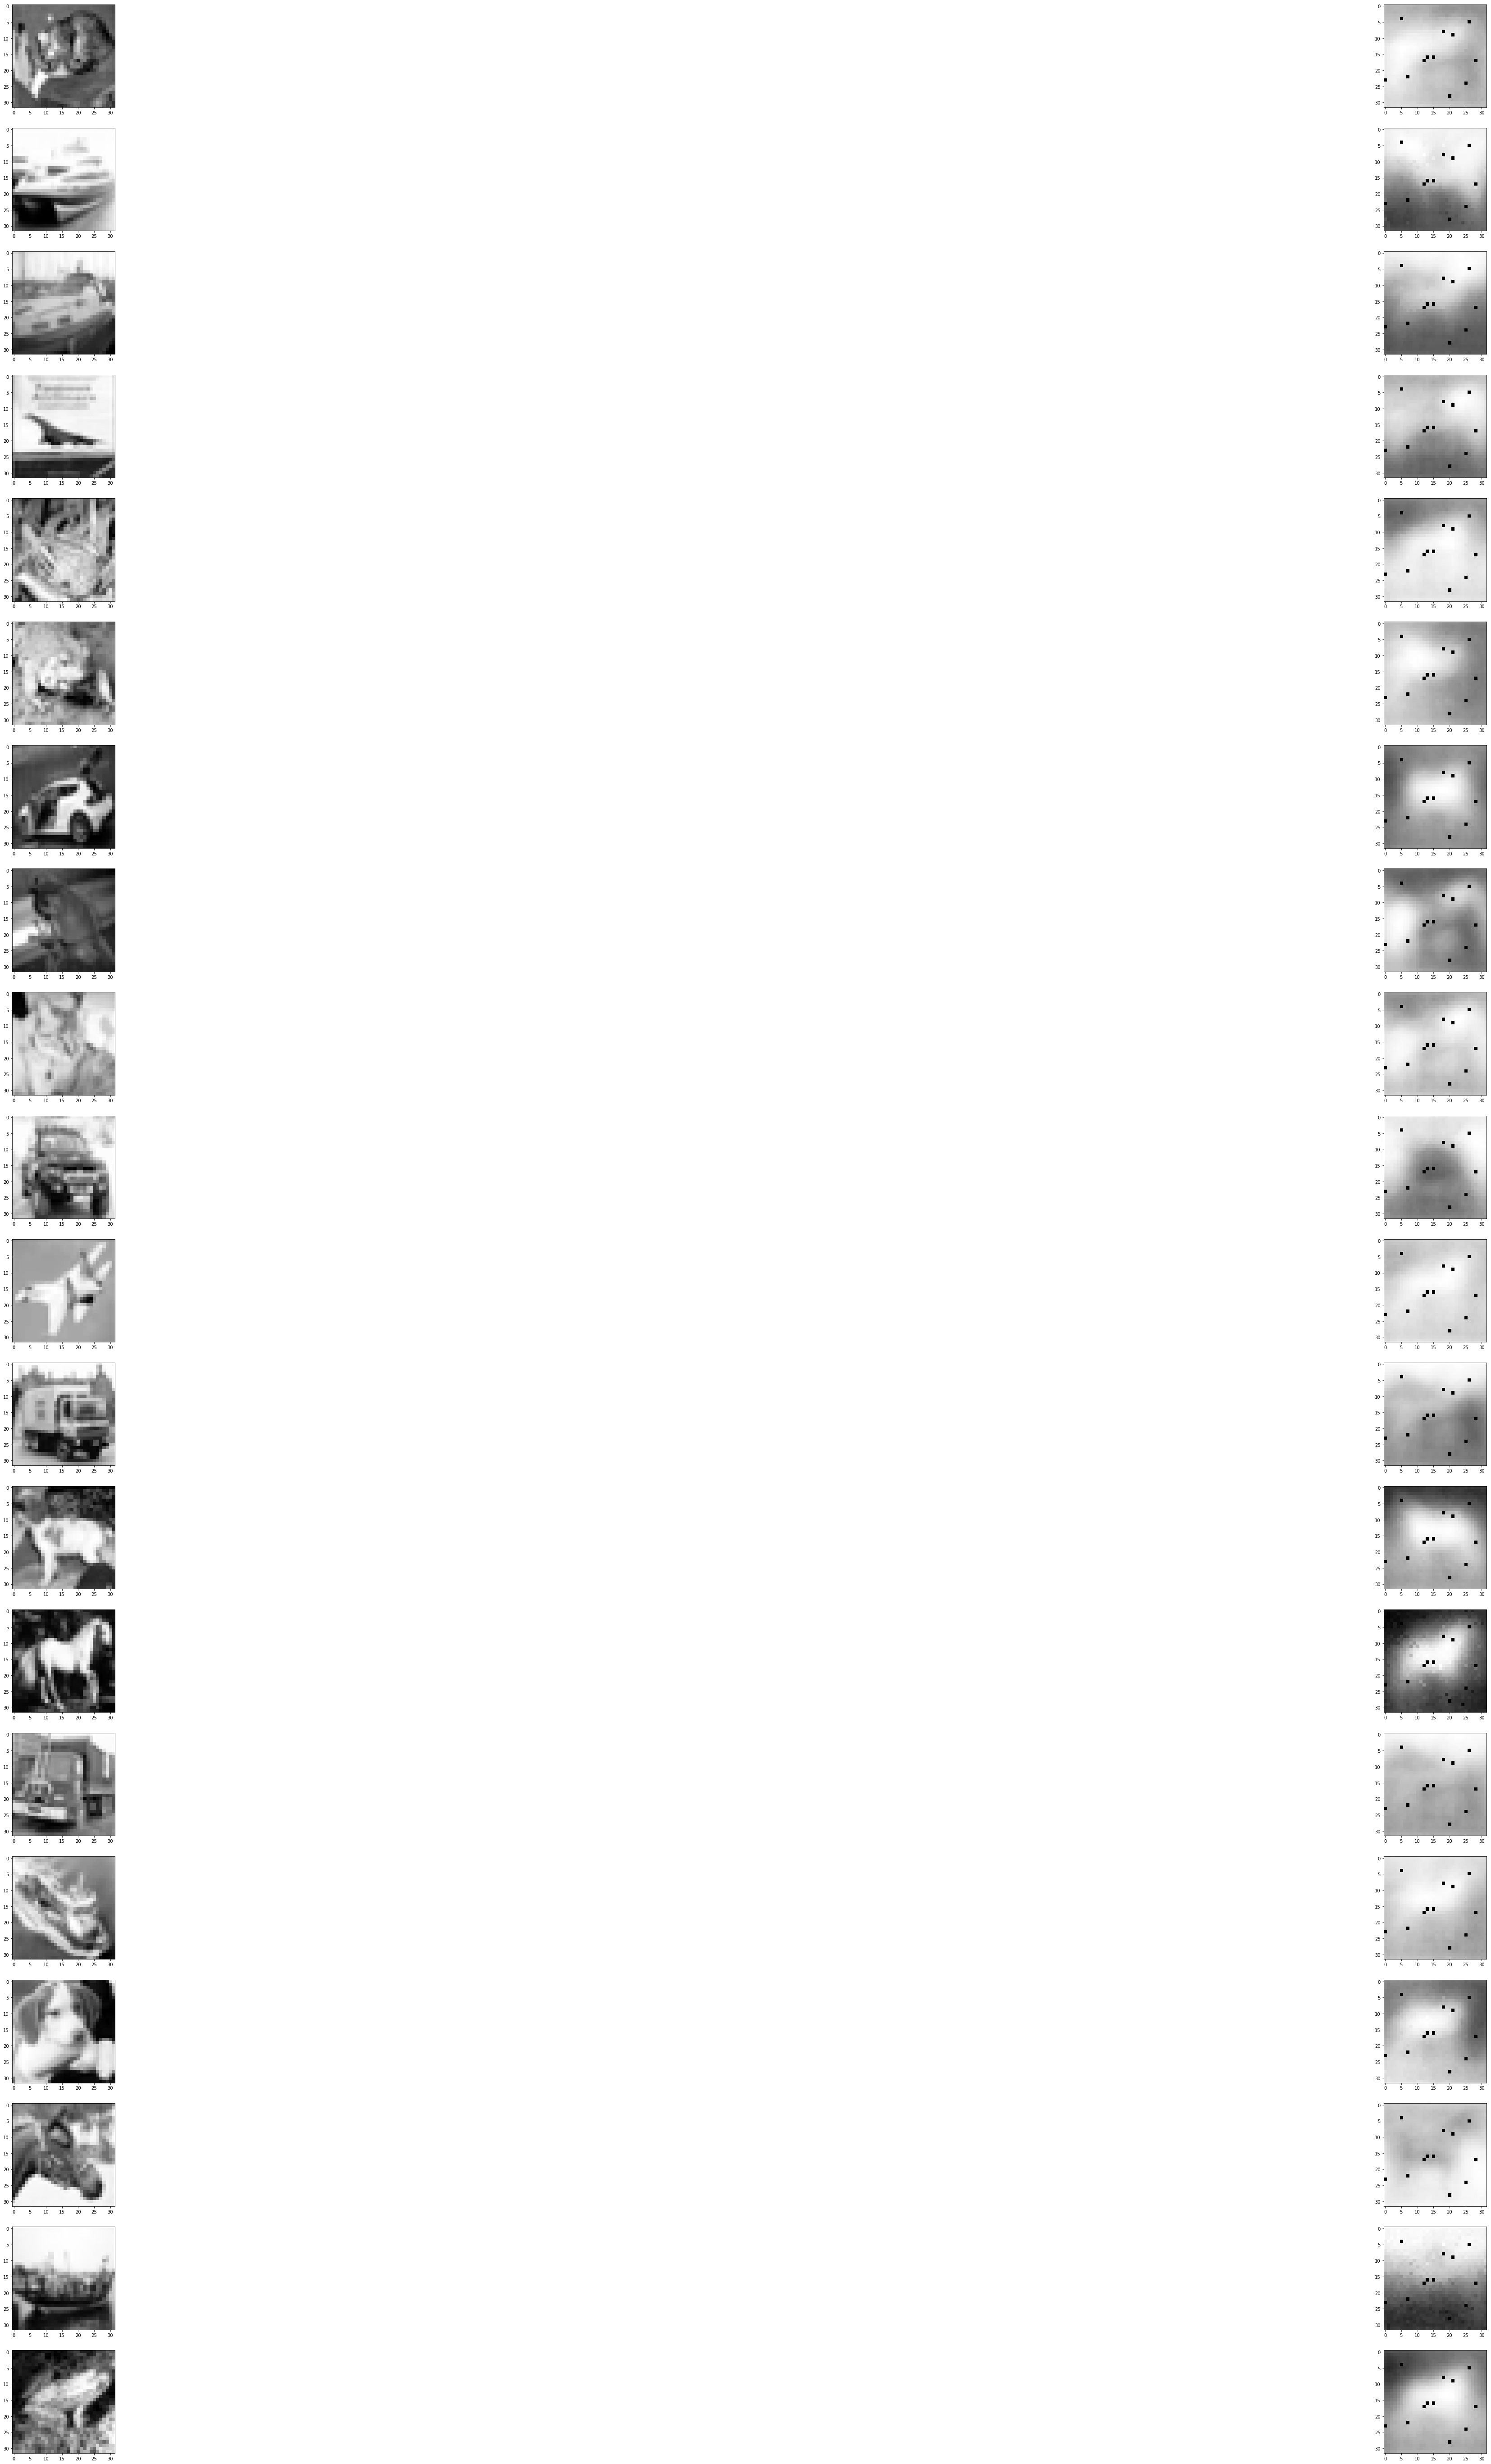

In [36]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.figure()
for i in range(20):
    plt.subplot(20, 2, i*2 + 1)
    original_img = np.reshape(test_x[i, :], (32, 32))
    plt.imshow(original_img, cmap='Greys_r')
    
    plt.subplot(20, 2, i*2 + 2)
    reconstructed_img = s_ae.results(test_x[i, :].reshape(1,1024))
    plt.imshow(reconstructed_img.reshape(32,32), cmap='Greys_r')

plt.show()